In [1]:
#Mounting google and authenticating
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

Mounted at /content/gdrive


In [ ]:
#fluidsynth approach conversion
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!fluidsynth -ni font.sf2 chp_op18.mid -F output.wav -r 44100
from IPython.display import Audio
Audio('output.wav')

In [2]:
import librosa
!cp /mydrive/music\ project/chp_op.wav ./


In [3]:
#fluidsynth interface approach
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!pip install midi2audio
from midi2audio import FluidSynth
from IPython.display import Audio

#FluidSynth("font.sf2").midi_to_audio('/content/chp_op18.mid', 'test.wav')
#Audio('test.wav')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 31 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libqt5x11extras5 amd64 5.9.5-0ubuntu1 [8,596 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic/uni

In [4]:
!cp /mydrive/music\ project/chopin_wav/*.wav ./wavs/

In [11]:
import os

data_path='/content/train/'
categories=os.listdir(data_path)

for sample in categories:
  m_mid = os.path.join(data_path, sample) 
  try:
    x = m_mid
    x = x.split('/')[-1].split('.')[0]
    FluidSynth("font.sf2").midi_to_audio(m_mid, '/content/train/{}.wav'.format(x))

  except Exception as e:
    print('Exception:',e)


In [12]:
!cp ./train/*.wav /mydrive/music\ project/chopin_wav

In [6]:
import os
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
X_spect = np.empty((0, 640, 128))
y_spect = np.empty((0, 80, 128))

data_path='/content/wavs/'
categories=os.listdir(data_path)

for sample in categories:
  m_wav = os.path.join(data_path, sample) 
  y, sr = librosa.load(m_wav)
  spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
  spect = librosa.power_to_db(spect, ref=np.max)
  spect_x = spect.T[:640,:]
  X_spect = np.append(X_spect, [spect_x], axis=0)
  spect_y = spect.T[640:720,:]
  y_spect = np.append(y_spect, [spect_y], axis=0)



(128, 13360) working


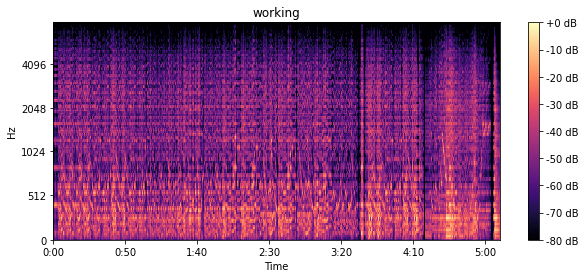

In [19]:
!cp /mydrive/music\ project/chp_op.wav ./
!cp /mydrive/music\ project/chpn_p24.wav ./

import matplotlib.pyplot as plt
import librosa.display

y, sr = librosa.load('/content/chp_op.wav')
import numpy as np
spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
spect = librosa.power_to_db(spect, ref=np.max)

genre_name = 'working'
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

(128, 8053) X_spec


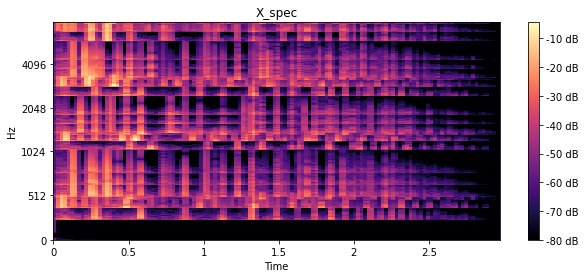

(128, 8053) y_spec


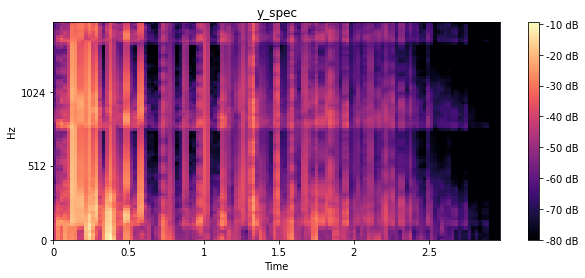

In [14]:
genre_name = 'X_spec'
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(X_spect[1], y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

genre_name = 'y_spec'
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(y_spect[1], y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()


In [9]:
y_spect.shape
type(y_spect)

numpy.ndarray

In [16]:
#pickling and export
import pickle
pickling_on = open("X_spec.pickle","wb")
pickle.dump(X_spect, pickling_on)
pickling_on.close()

pickling_on = open("y_spec.pickle","wb")
pickle.dump(y_spect, pickling_on)
pickling_on.close()

!cp ./X_spec.pickle /mydrive/music\ project/
!cp ./y_spec.pickle /mydrive/music\ project/

In [ ]:
#Import
import pickle 
pickle_off = open("EmpID.pickle", 'rb')
EmpID = pickle.load(pickle_off)
print(EmpID)